# Format covariate files for GEMMA

As described here (https://www.biostars.org/p/305296/) and in the GEMMA manual, covariate files must contain:
- A column of 1 for the y-intercept
- One column for each covariate
- No header
- No row names or genotype labels. Genotype IDs are inferred from order.

## Prepare covariate files for stem regeneration GWAS

### Load data

In [1]:
covariates_in <-
read.csv("../05_Parsing_phenodata/covariate_files/stem_regen_covariates/Covariates_Stem_AllPhases.txt",
         sep = "\t")

In [2]:
head(covariates_in)

,Stem_diam_mm,Ph1,Ph2,Ph3,Ph4,Ph5,Ph6,Ph7,Ph8
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,7.165,0,0,0,0,0,0,0,1
3,6.550,0,0,0,0,1,0,0,0
4,7.020,0,1,0,0,0,0,0,0
5,10.150,0,0,0,0,1,0,0,0
6,6.565,0,0,0,0,1,0,0,0


### Remove column for one phase

This is because one phase needs to be assigned to the intercept.

In [3]:
covariates_out <- covariates_in[,1:8]

In [4]:
head(covariates_out)

,Stem_diam_mm,Ph1,Ph2,Ph3,Ph4,Ph5,Ph6,Ph7
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NA,NA,NA,NA,NA,NA,NA,NA
2,7.165,0,0,0,0,0,0,0
3,6.550,0,0,0,0,1,0,0
4,7.020,0,1,0,0,0,0,0
5,10.150,0,0,0,0,1,0,0
6,6.565,0,0,0,0,1,0,0


### Add column of 1's for intercept

In [5]:
covariates_out <- cbind(rep(1, nrow(covariates_out)),
                        covariates_out)

### Plot data as a heat map

This will help us troubleshoot the singular matrix error that occurs when we run timepoint 4 and timepoint 5 data in GEMMA. We wish to see if there is any redundancy between covariates that would lead to a matrix singularity.

We will use `pheatmap` to plot our matrix as a heatt map, as explained here: https://stackoverflow.com/questions/34665852/r-how-can-i-make-a-heatmap-out-of-a-simple-matrix

#### Load `pheatmap` library

In [6]:
# install.packages("pheatmap")

In [7]:
library(pheatmap)

#### Order covariates according to their value, for more useful visualization.

The way to do this for a `data.table` is explained here: https://stackoverflow.com/questions/50282341/how-to-sort-a-data-table-using-vector-of-multiple-columns

In [8]:
phase_only <- covariates_in[,2:9]

In [9]:
colnames(phase_only)

[1] "Ph1" "Ph2" "Ph3" "Ph4" "Ph5" "Ph6" "Ph7" "Ph8"

In [10]:
library(data.table)

In [11]:
setorderv(phase_only, colnames(phase_only))

#### Produce heat map

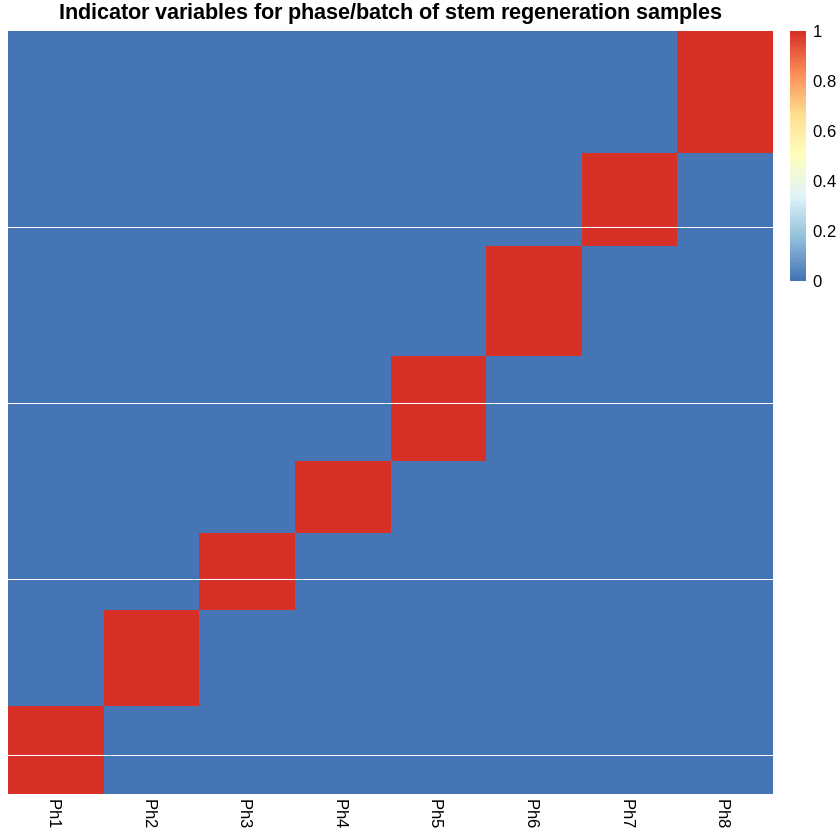

In [32]:
pheatmap(na.omit(covariates_in[,2:9]) , cluster_rows = FALSE, cluster_cols = FALSE, labels_row = "", main = "Indicator variables for phase/batch of stem regeneration samples")

### Write out in desired format

To write without column names in base R, use function `write.table`, described here: https://stackoverflow.com/questions/19227243/write-a-data-frame-to-csv-file-without-column-header-in-r

#### For everything except Ph8

In [6]:
write.table(covariates_out,
            file = "covariates/Stem_regen_diam_and_phases_sansPh8.cov",
            row.names = FALSE, col.names = FALSE,
            sep = "\t",
            quote = FALSE)

#### For everything except Ph8 and Ph1

In [11]:
head(covariates_out)

,"rep(1, nrow(covariates_out))",Stem_diam_mm,Ph1,Ph2,Ph3,Ph4,Ph5,Ph6,Ph7
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,NA,NA,NA,NA,NA,NA,NA,NA
2,1,7.165,0,0,0,0,0,0,0
3,1,6.550,0,0,0,0,1,0,0
4,1,7.020,0,1,0,0,0,0,0
5,1,10.150,0,0,0,0,1,0,0
6,1,6.565,0,0,0,0,1,0,0


In [12]:
covariates_out_sans_Ph1 <- covariates_out

In [13]:
covariates_out_sans_Ph1$Ph1 <- NULL

In [17]:
write.table(covariates_out_sans_Ph1,
            file = "covariates/Stem_regen_diam_and_phases_sansPh1Ph8.cov",
            row.names = FALSE, col.names = FALSE,
            sep = "\t",
            quote = FALSE)

#### For everything except Ph8, Ph1 and Ph3

In [15]:
covariates_out_sans_Ph1Ph3 <- covariates_out_sans_Ph1

In [16]:
covariates_out_sans_Ph1Ph3$Ph3 <- NULL

In [19]:
head(covariates_out_sans_Ph1Ph3)

,"rep(1, nrow(covariates_out))",Stem_diam_mm,Ph2,Ph4,Ph5,Ph6,Ph7
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1,NA,NA,NA,NA,NA,NA
2,1,7.165,0,0,0,0,0
3,1,6.550,0,0,1,0,0
4,1,7.020,1,0,0,0,0
5,1,10.150,0,0,1,0,0
6,1,6.565,0,0,1,0,0


In [18]:
write.table(covariates_out_sans_Ph1Ph3,
            file = "covariates/Stem_regen_diam_and_phases_sansPh1Ph3Ph8.cov",
            row.names = FALSE, col.names = FALSE,
            sep = "\t",
            quote = FALSE)

### Check how phenotypes correlate with indicator variables

#### For raw phenotypes

In [34]:
callus_2w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/callus_2w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
callus_3w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/callus_3w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
callus_4w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/callus_4w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
callus_5w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/callus_5w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))

In [35]:
shoot_2w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/shoot_2w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
shoot_3w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/shoot_3w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
shoot_4w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/shoot_4w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))
shoot_5w <- read.csv("../05_Parsing_phenodata/pheno_files/stem_regen/shoot_5w.header.pheno", sep = "\t",
                     colClasses=c("character", "character", "numeric"))

In [36]:
combined_traits <- cbind(callus_2w, callus_3w$callus_3w,
                         callus_4w$callus_4w, callus_5w$callus_5w,
                         shoot_2w$shoot_2w, shoot_3w$shoot_3w,
                         shoot_4w$shoot_4w, shoot_5w$shoot_5w)

In [43]:
covariates_in <-
read.csv("../05_Parsing_phenodata/covariate_files/stem_regen_covariates/Covariates_Stem_AllPhases.txt",
         sep = "\t")

In [44]:
combined_traits_phase <- cbind(combined_traits, covariates_in[,2:9])

In [46]:
colnames(combined_traits_phase)[3:10] <- c("callus_2w", "callus_3w", "callus_4w", "callus_5w",
                                           "shoot_2w", "shoot_3w", "shoot_4w", "shoot_5w")

How to compute and plot correlation matrix? Explained here: http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

In [65]:
setorderv(combined_traits_phase, colnames(phase_only))

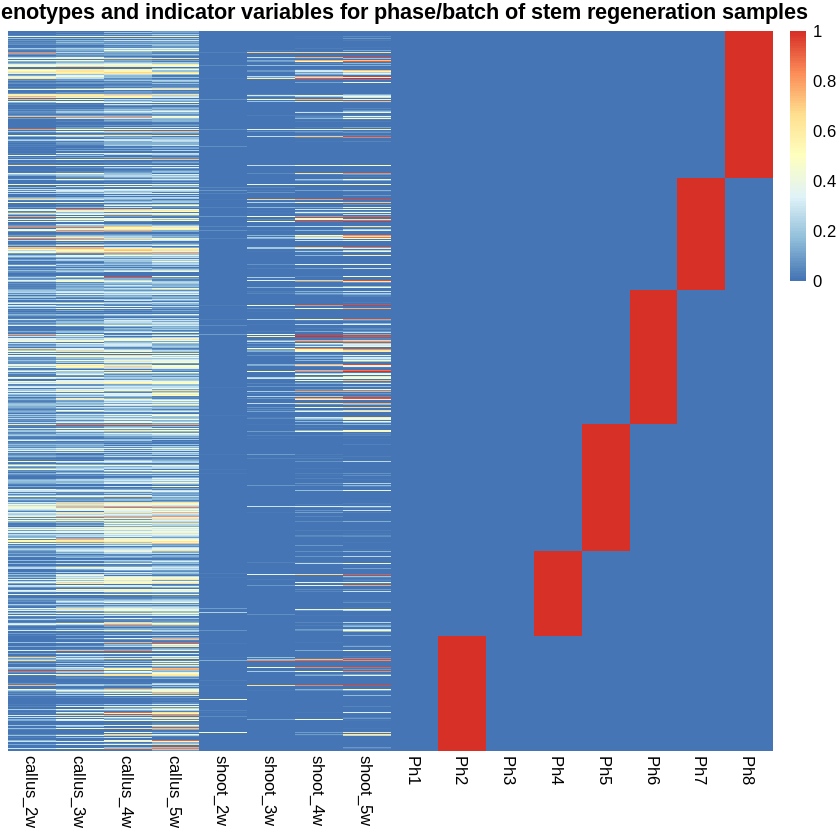

In [66]:
pheatmap(na.omit(combined_traits_phase[,3:18]) , cluster_rows = FALSE, cluster_cols = FALSE, labels_row = "", main = "Phenotypes and indicator variables for phase/batch of stem regeneration samples")

In [52]:
M <- cor(na.omit(combined_traits_phase[, 3:18]))

Warning message in cor(na.omit(combined_traits_phase[, 3:18])):
“the standard deviation is zero”


In [53]:
library(corrplot)

In [54]:
head(M)

,callus_2w,callus_3w,callus_4w,callus_5w,shoot_2w,shoot_3w,shoot_4w,shoot_5w,Ph1,Ph2,Ph3,Ph4,Ph5,Ph6,Ph7,Ph8
callus_2w,1.00000000,0.81610330,0.569963112,0.37820805,0.09885696,0.511208435,0.52257678,0.48148732,NA,-0.16934413,NA,-0.03187120,0.11020195,0.05324901,0.028360442,-0.001537612
callus_3w,0.81610330,1.00000000,0.797926290,0.56561988,0.01432684,0.230993698,0.41372103,0.46059571,NA,-0.17112461,NA,0.01443698,0.08373942,0.05388219,0.067452567,-0.047744084
callus_4w,0.56996311,0.79792629,1.000000000,0.81967574,0.02275316,-0.007077851,0.07622353,0.21749782,NA,-0.08044795,NA,0.01625169,0.09108665,0.01553089,0.039885239,-0.076797891
callus_5w,0.37820805,0.56561988,0.819675745,1.00000000,-0.02519475,-0.103826208,-0.09509455,-0.03480283,NA,0.07067965,NA,-0.03586820,0.10792484,-0.01122049,-0.012681047,-0.115172225
shoot_2w,0.09885696,0.01432684,0.022753162,-0.02519475,1.00000000,0.168305300,0.10602725,0.12383549,NA,0.09885522,NA,0.01894188,-0.05353478,-0.03160773,-0.002567786,-0.021625432
shoot_3w,0.51120844,0.23099370,-0.007077851,-0.10382621,0.16830530,1.000000000,0.81057989,0.64103925,NA,-0.03058231,NA,-0.07485196,-0.10471798,0.10049214,0.058579258,0.037404796


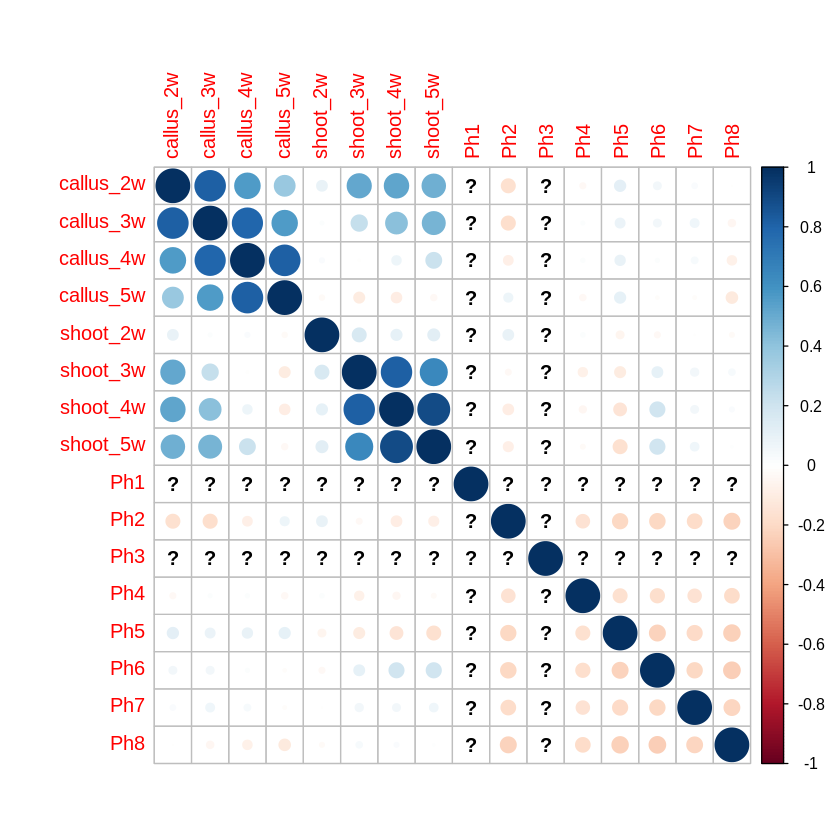

In [55]:
corrplot(M, method = "circle")

<div class="alert alert-block alert-warning"> I think the problem is that Phase 1 / 3 have no data for certain timepoints. Let's check. </div>


In [67]:
check_data <- fread("../05_Parsing_phenodata/stem_regen_parsing_midway/stem_regen_phenos_mid_parsing.csv")

In [72]:
phase_timepoint <- stringr::str_split_fixed(check_data$Phase, "\\.", 2)

In [74]:
head(phase_timepoint)

1,2
1,2
1,2
1,2
1,2
1,2


In [75]:
table(phase_timepoint[,1], phase_timepoint[,2])

   
          2   3   4   5
  1 399 400 398   0   0
  2 400 400 400 400 401
  3   0 400 400   0 405
  4   0 404 400 400 401
  5   0 394 394 393 394
  6   0 396 396 396 396
  7   0 354 354 354 354
  8   0 400 400 400 400

<div class="alert alert-block alert-success"> I think we can resolve the singular matrix error in GEMMA if we produce covariate files with... no Ph1 / 3 indicator for wk4 phenotypes, no Ph 1 indicator for wk5 phenotypes. </div>


In [68]:
head(check_data)

...1,Phase,file_name,stem,callus,shoot,TDZ,Genotype
<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1.2,BESC_271_0.0_GWAS 1.2_2017-08-17_015226.png,100.00,0.00,0.00,0.0,BESC-271
1,1.2,BESC_286_0.0_GWAS 1.2_2017-08-17_045558.png,100.00,0.00,0.00,0.0,BESC-286
2,1.2,BESC_404_0.5_GWAS 1.2_2017-08-17_015436.png,96.15,3.79,0.06,0.5,BESC-404
3,1.2,GW_9581.0_0.5_GWAS 1.2_2017-08-17_022546.png,94.51,5.49,0.00,0.5,GW-9581
4,1.2,GW_9806_0.5_GWAS 1.2_2017-08-17_041956.png,73.41,26.59,0.00,0.5,GW-9806
5,1.2,BESC_34_0.5_GWAS 1.2_2017-08-17_020706.png,68.62,31.38,0.00,0.5,BESC-34
